# Business Understanding

The percentage of total CHD events occurring in the population with established CHD was approximately 43% in both men and women, for CHD death 55% and 51%, and for nonfatal MI 35% and 36%, respectively. In those with established CHD 30% had more than 1 recurrent event. Therefore, we choose the cardiac dataset to predict the factors that are related to cardiac events, like hypertention, smoking, cholesterol among others factors. We will analize the outcome of cardiac disease(Miocardial infartion) as yes or not events.

# Data Meaning Type

There are 3 types of attributes:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient


**age** (Objective):    The age of the patient in days.  Values range from 10798 days (29 years) to 23713 days (about 65 years)

**height** (Objective):   The height of the patient in centimeters

**weight** (Objective):  The weight of the patient in Kilograms

**gender** (Objective):  Categorical code of 1 for woman or 2 for man

**ap_hi** (Examination):  Systolic Blood Pressure   *Integer* 

**ap_lo** (Examination):  Diastolic blood pressure   *Integer*

**cholesterol** (Examination): 1: normal, 2: above normal, 3: well above normal

**gluc**  (Examination):  Glucose  1: normal, 2: above normal, 3: well above normal

**smoke** (Subjective)   Indicator to determine whether patient smokes or not  (binary)

**alco** (Subjective): Indicator to determine if patient drinks alcohol or not (binary)

**active** (Subjective): Indicator to determine if patient is active or not (binary)

**cardio** (Examination):  Target variable to determine if heart disease is present (binary)

<b>The following are variables created within the EDA process:</b>
<br>
<br><b>age_yr</b>: Age in years.   Age (in days) / 360
<br><b>new cholesterol column</b>:  Normal (cholesterol = 1) or High (cholesterol = 2 or 3)
<br><b>new glucose column</b>:  Normal (gluc=1) or High (gluc = 2 or 3) 
<br><b>BMI</b>: Body Mass Index calculated as folows: <b> weight (in kg) / (height(in cm)/100)^2 </b>
<br>
<br><b>bmiGrp</b>: Grouping body mass index into 4 categorical groups:
<br><b>Values</b>
<br><b> 1</b>: Underweight: BMI < 18.5)
<br><b> 2</b>: Normal: BMI between 18.5 and 25
<br><b> 3</b>: Over Weight: BMI between 25 and 30
<br><b> 4</b>: Obese:  BMI  > 30
<br>
<br><b>bp</b>: Grouping blood pressure into 4 categorical groups:
<br><b> Values</b>
<br><b> 1</b>: Normal:  Systolic Blood Pressure Less than 120 and Diastolic blood pressure Less than 80
<br><b> 2</b>: Elevated:  Systolic Blood Pressure between 120 and 130 and Diastolic blood pressure Less than 80
<br><b> 3</b>: Hyper_Stage_1: Systolic Blood Pressure between 130 and 140 and Diastolic blood pressure between 80 and 90
<br><b> 4</b>: Hyper_Stage_2:  Systolic Blood Pressure greater or equal to 140 and Diastolic greater than or equal to 90
<br><b> 5</b>: Hyper_Stage_3: Systolic Blood Pressure greater than 180 and Diastolic blood pressure greater than 120



# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=';')

# Data Quality

There are no missing values.

In [2]:
n= df.isna().sum()
n

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no duplicated observations.

In [3]:
df.duplicated(subset=None, keep='first').describe()

count     70000
unique        1
top       False
freq      70000
dtype: object

### Data Outlier

Based on the histograms of all the variables, we can see that ap_hi and ap_lo must have outliers that are pulling the graph axis very far out, that we cannot see the distribution clearly because all the points are lumped into the same bin.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>],
       [<AxesSubplot:title={'center':'cardio'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

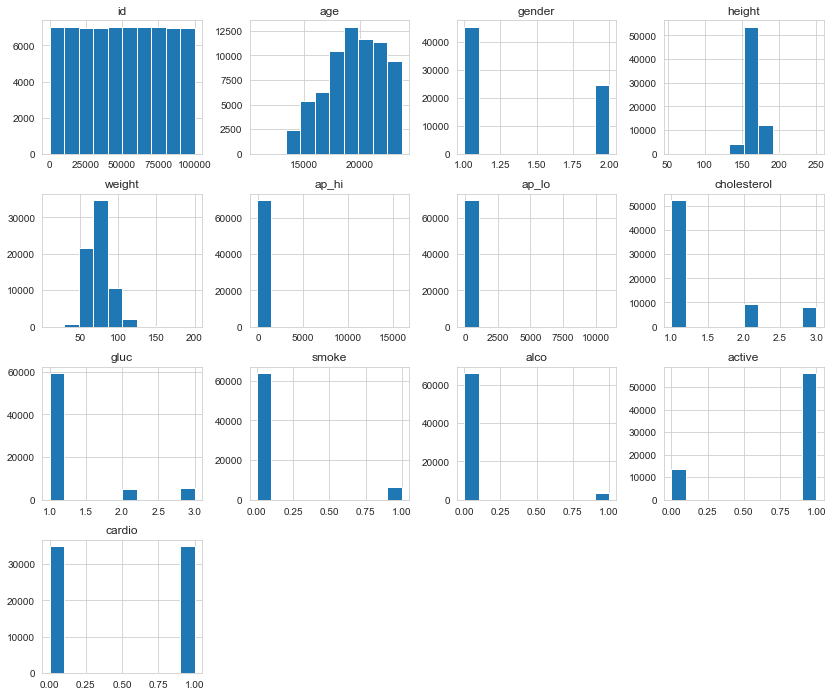

In [4]:
#Histogram charts, to look at the distribution of the values in the column to investigate for outliers

sns.set_style('whitegrid')
df_num = df.select_dtypes(include=['float64'])
df.hist(figsize =(14,12))

As suspected, we can tell that ap_hi and ap_lo have outliers because the mins and maxes are not reasonable values for blood pressure.

In [5]:
# Selected column to look for outliers
dfs= df[["age", "height", "weight", "ap_hi", "ap_lo"]]
dfs.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


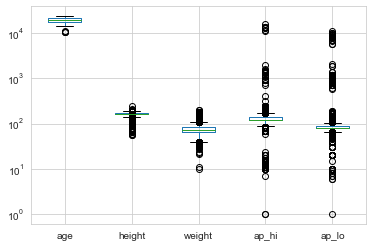

In [6]:
# Box plot of the diferents variables to gain more general information of the distribution values in the variables
ax = dfs.boxplot()
ax.set_yscale('log')

In [7]:
#Let examine the height, weight and blood pressure
dfhw= df[["height", "weight","ap_hi", "ap_lo"]]
dfhw

dfbp= dfhw[np.abs(dfhw -dfhw.mean()) <= (3*dfhw.std())]
dfhw
dfhw.describe() 

,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,128.817286,96.630414
std,8.210126,14.395757,154.011419,188.472530
min,55.000000,10.000000,-150.000000,-70.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,170.000000,82.000000,140.000000,90.000000
max,250.000000,200.000000,16020.000000,11000.000000


By keeping only the ones that are within +3 to -3 standard deviations in the column selected. We have the display from the above code. So, in this case, this code does not help us, so we will proceed to work each column by hand and take out the mistaken value in the code that follow below.

In [8]:
# We address the outlier of the BP by taaking the reasonable blood presure measurement, 
# the other value likely are a mistake
df1 = df[df["ap_hi"] < 200]
df1 = df1[df1["ap_hi"] > 110]
df1 = df1[df1["ap_lo"] < 150]
df1 = df1[df1["ap_lo"] > 60]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000
mean,50051.237953,19681.483805,1.366199,164.658906,75.389983,131.062238,83.799921,1.394406,1.240460,0.089471,0.054844,0.800390,0.553960
std,28868.075564,2399.653297,0.481769,8.165963,14.335829,14.220016,7.703276,0.705501,0.589845,0.285425,0.227678,0.399711,0.497084
min,1.000000,10859.000000,1.000000,55.000000,11.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25029.250000,18159.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50104.000000,19830.000000,1.000000,165.000000,73.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74971.500000,21698.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# We address the weight with reasonable weight, the other values probably are a mistake
df1 = df1[df1["weight"] < 200]
df1 = df1[df1["weight"] > 55]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000
mean,50057.197730,19681.349345,1.373701,164.989817,76.431673,131.173148,83.861805,1.396928,1.243224,0.090103,0.055658,0.799880,0.558764
std,28827.698563,2395.071935,0.483790,8.034020,13.677961,14.261529,7.724774,0.707480,0.592667,0.286332,0.229262,0.400094,0.496539
min,1.000000,10859.000000,1.000000,55.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25105.250000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50069.500000,19829.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74921.500000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# We address the height, the other values probably are a mistake
df1 = df1[df1["height"] < 200]
df1 = df1[df1["height"] > 130]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000
mean,50059.609824,19681.817352,1.373739,165.069421,76.417400,131.177294,83.863043,1.397150,1.243247,0.090136,0.055661,0.799974,0.558819
std,28829.182391,2394.809551,0.483800,7.683949,13.638346,14.262603,7.724346,0.707587,0.592685,0.286380,0.229269,0.400024,0.496533
min,1.000000,10859.000000,1.000000,131.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25109.000000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50079.000000,19830.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74926.000000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The age is appropriate for a human person from 30 to 65 year old.Please see below

In [11]:
df1.age.describe()
age= df1.age/360
age.describe

<bound method NDFrame.describe of 1        56.188889
2        52.380556
3        48.952778
5        60.872222
6        61.425000
           ...    
69995    53.444444
69996    62.780556
69997    52.961111
69998    62.308333
69999    57.055556
Name: age, Length: 53053, dtype: float64>

Normal blood pressure is below 120/80 mm Hg.If you’re an adult and your systolic pressure is 120 to 129, and your diastolic pressure is less than 80, you have elevated blood pressure. High blood pressure is a systolic pressure of 130 or higher,or a diastolic pressure of 80 or higher, that stays high over time. High blood pressure usually has no signs or symptoms. That’s why it is so dangerous. But it can be managed. Nearly half of the American population over age 20, has HBP, and many don’t even know it. Not treating high blood pressure is dangerous. High blood pressure increases the risk of heart attack and stroke. Stage 1(systolic BP 130 to 140 and dystolic blood presure more than 80) is more dangerous than just high blood pressure. Stage 2(systolic blood presure more than 140 to 180 and dystolic blood pressure more than 90), more dangerous than stage 1. Stage 3(systolic blood pressure more than 180 and dystolic blood pressure more than 120). Stage 3 is more dangerous than stage 1 and 2. In the graph above you can see how the higher the blood pressure in each of the levels(Normal, high blood pressure, stage1, stage 2, stage 3) the most likely to have a heart event.

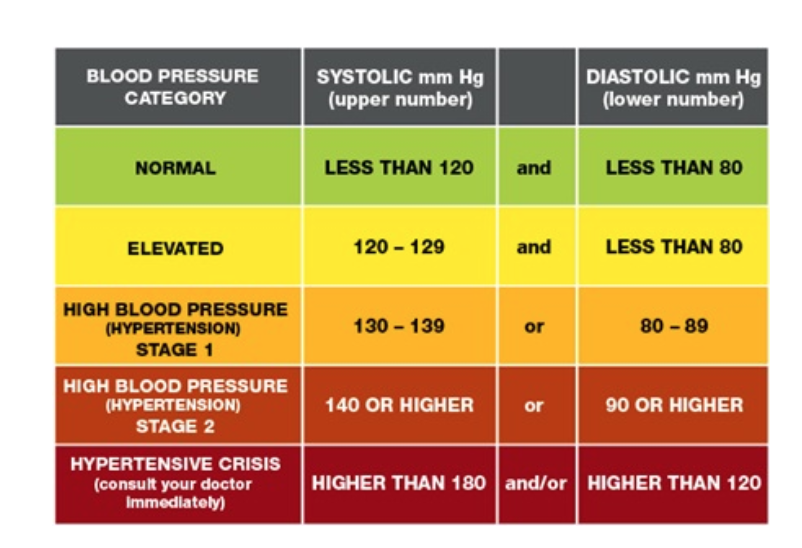

In [12]:
# bin blood pressure groups based on the api hi/ lo variables
df1['bp'] = np.where((df1.ap_hi < 120) & (df1.ap_lo < 80), 1, 0)
df1['bp'] = np.where((df1.ap_hi >= 120) & (df1.ap_hi < 130) & (df1.ap_lo < 80), 2, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 130) & (df1.ap_hi < 140) | ((df1.ap_lo >= 80) & (df1.ap_lo < 90)), 3, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 140) | (df1.ap_lo >= 90), 4, df1.bp)
df1['bp'] = np.where((df1.ap_hi > 180) | (df1.ap_lo > 120), 5, df1.bp)
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,3
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,4
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,3
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,3
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,4
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,4
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,3


In [13]:
df1['bp1'] = pd.cut(df1.bp,[0,1,2,3,4,5],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df1.bp1

1        Hyper_Stage2
2        Hyper_Stage1
3        Hyper_Stage2
5        Hyper_Stage1
6        Hyper_Stage1
             ...     
69995    Hyper_Stage1
69996    Hyper_Stage2
69997    Hyper_Stage2
69998    Hyper_Stage1
69999    Hyper_Stage1
Name: bp1, Length: 53053, dtype: category
Categories (5, object): ['Normal' < 'Elevated' < 'Hyper_Stage1' < 'Hyper_Stage2' < 'Hyper_Stage3']

Text(0.5, 1.0, 'Cardiac Event and Blood Pressure')

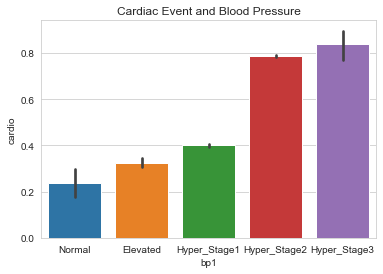

In [14]:

sns.barplot(x='bp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and Blood Pressure')

BMI Clasification

In [15]:
# compute the body mass index based on weight and height
df1['bmi'] = df1['weight'] / (df1['height']/100)**2
# create a BMI group
df1['bmiGrp'] = np.where((df1.bmi < 18.5), 1, 0)
df1['bmiGrp'] = np.where((df1.bmi >= 18.5) & (df1.bmi < 25), 2, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 25) & (df1.bmi < 30), 3, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 30), 4, df1.bmiGrp)

In [16]:
df1['bmiGrp1'] = pd.cut(df1.bmiGrp,[0,1,2,3,4],4,labels=['Under Weight','Normal Weight','Over Weight','Obese' ]) # this creates a new variable
df1.bmiGrp1

1                Obese
2        Normal Weight
3          Over Weight
5          Over Weight
6                Obese
             ...      
69995      Over Weight
69996            Obese
69997            Obese
69998      Over Weight
69999    Normal Weight
Name: bmiGrp1, Length: 53053, dtype: category
Categories (4, object): ['Under Weight' < 'Normal Weight' < 'Over Weight' < 'Obese']

Text(0.5, 1.0, 'Cardiac Event and BMI')

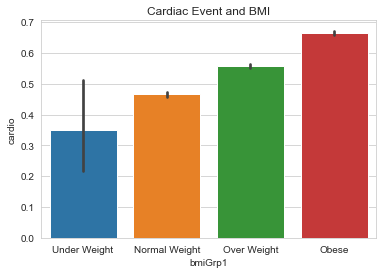

In [17]:
sns.barplot(x='bmiGrp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and BMI')

In [18]:
df = df1

# Simple Statistics

### Checking the types of data

Check for the datatypes to ensure integer are not stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.


### Count number or rows and columns in dataframe 

In [19]:
df.shape       ## Dim of data frme

(53053, 18)


### Count the number of rows for each column

This is to find the number of rows and see how many rows are blank of nulls


### Statistical Summary
To better understaning of data creat a Statistical Summary or 5-point summary of the cleaned up dataset . The 5-point summary tells the descriptive summary which includes mean, median, mode, no. of rows, maximum value, and minimum value for each variable.

In [20]:
df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp,bmi,bmiGrp
count,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000
mean,50059.609824,19681.817352,1.373739,165.069421,76.417400,131.177294,83.863043,1.397150,1.243247,0.090136,0.055661,0.799974,0.558819,3.367463,28.120037,2.971010
std,28829.182391,2394.809551,0.483800,7.683949,13.638346,14.262603,7.724346,0.707587,0.592685,0.286380,0.229269,0.400024,0.496533,0.592263,5.133171,0.787654
min,1.000000,10859.000000,1.000000,131.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.577259,1.000000
25%,25109.000000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,24.337480,2.000000
50%,50079.000000,19830.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,26.989619,3.000000
75%,74926.000000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,30.846277,4.000000
max,99999.000000,23713.000000,2.000000,198.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,85.779743,4.000000


In [21]:
# Count men and Women

df['gender'].value_counts()

1    33225
2    19828
Name: gender, dtype: int64

Dataset contains 1.8 time more women than men. 


<AxesSubplot:ylabel='gender'>

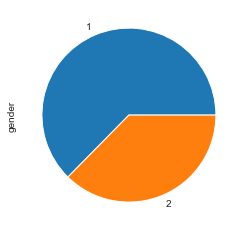

In [22]:
# gender
df["gender"].value_counts().plot(kind='pie')

In [23]:
# Count Cholesterol Levels

df['cholesterol'].value_counts()

1    38913
2     7210
3     6930
Name: cholesterol, dtype: int64


25% people in data set have higer cholesterol


<AxesSubplot:ylabel='cholesterol'>

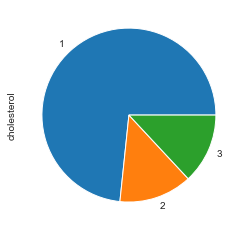

In [24]:
# Cholestrol
df["cholesterol"].value_counts().plot(kind='pie')

In [25]:
# Count glucose  Levels

df['gluc'].value_counts()

1    44583
3     4435
2     4035
Name: gluc, dtype: int64


15% people have higher glucose


<AxesSubplot:ylabel='gluc'>

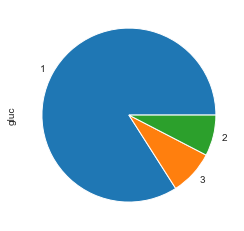

In [26]:
# glucose Pie Chart
df["gluc"].value_counts().plot(kind='pie')

In [27]:
# Count smokers vs. non-smokers

df['smoke'].value_counts()

0    48271
1     4782
Name: smoke, dtype: int64


8% are smoker in data set. 


<AxesSubplot:ylabel='smoke'>

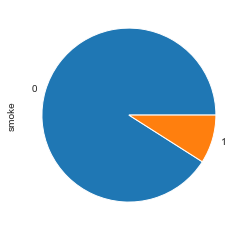

In [28]:
# Smoke Pie Chart
df["smoke"].value_counts().plot(kind='pie')

In [29]:
# Count activity people vs. non-smokers

df['cardio'].value_counts()


1    29647
0    23406
Name: cardio, dtype: int64

~50% sample have CVD so well blanced data.

<AxesSubplot:ylabel='cardio'>

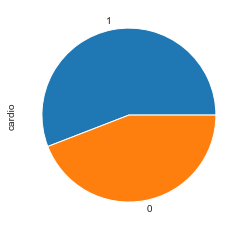

In [30]:
# Cadio Pie Chart
df["cardio"].value_counts().plot(kind='pie')

### Calcualte Mean, Median and Mode

In [31]:
#Calculate Mean of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].mean()

age       19681.817352
height      165.069421
weight       76.417400
ap_lo        83.863043
ap_hi       131.177294
dtype: float64

In [32]:
#Calculate Median of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].median()

age       19830.0
height      165.0
weight       74.0
ap_lo        80.0
ap_hi       125.0
dtype: float64

In [33]:
#Calculate Mode of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi','cholesterol','gluc', 'smoke', 'alco', 'active']].mode()

,age,height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active
0,20442,165.0,65.0,80.0,120.0,1.0,1.0,0.0,0.0,1.0
1,21892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Mean, Medin and Mode for Age in days

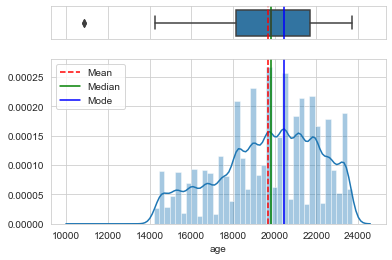

In [34]:
# Calcualte and plot mean medium and mode of age and spread of data

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode()[0]
# create Box Plot
sns.boxplot(df["age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["age"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Mediun ad Mode are dispersed in dataset. Value calcuated above show, mean as 19469, medium as 19763 and mode as 18236. 

### Avg Height of Woman and Men:
To figure out whether "1" stands for women or men in the gender column. Calculate the mean of height per gender. We assume that men are taller than women on average.

Average height for women in data is 161.1 cm and average height of men is 170 cmm.

Based on the outcome, women ware denoted by 1, and Man are represented by 2.

In [35]:
df.groupby('gender')['height'].mean()

gender
1    161.955546
2    170.287220
Name: height, dtype: float64

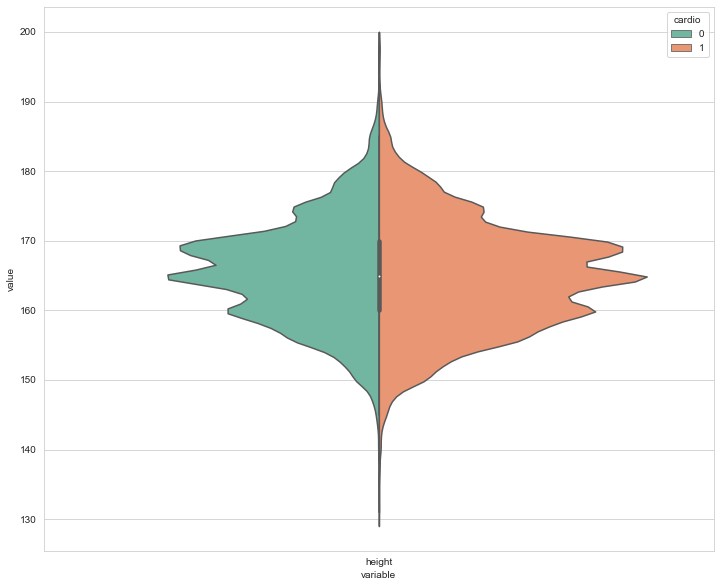

In [36]:
# Height
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

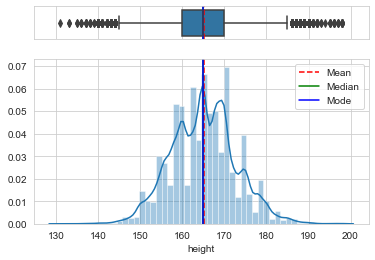

In [37]:

# Calcualte and plot mean medium and mode of Age and spread of data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['height'].mean()
median=df['height'].median()
mode=df['height'].mode()[0]
# create Box Plot
sns.boxplot(df["height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()


Mean Mediam and Mode are nicely aligned



### Mean, Median and Mode for Weight:


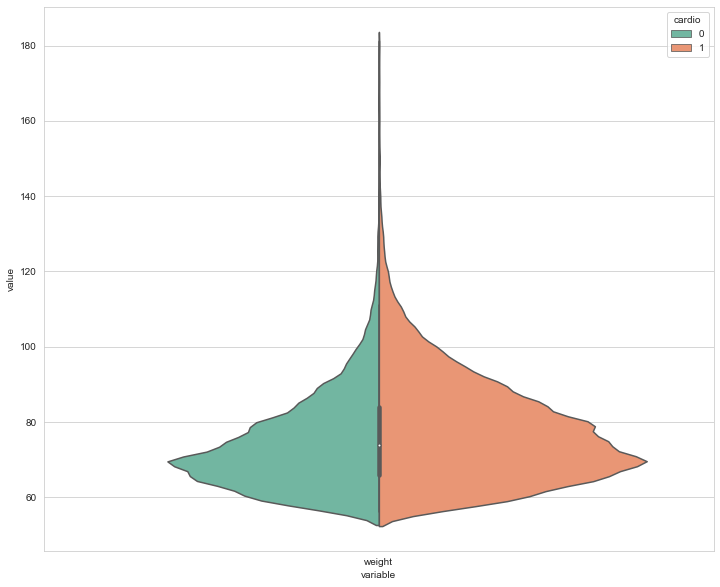

In [38]:
# Weight
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

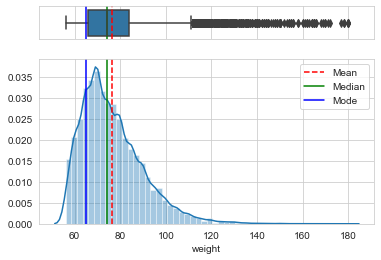

In [39]:
# Calcualte and plot mean medium and mode of age and spread of dataCalcualte mean medium and mode

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['weight'].mean()
median=df['weight'].median()
mode=df['weight'].mode()[0]
# create Box Plot
sns.boxplot(df["weight"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["weight"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# ceate legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Mediam and Mode are not aligned. Mean get infulanced by extrime values. As listed calculated above mean is 74, Mediam is 72 and mode is 65.  As mean is higher than mode and medium it is indication dataset have extrime values on higher side of weight.midle of weight is at 72 and most of the weight value is 65. 


### Mean, Median and Mode for ap_hi:


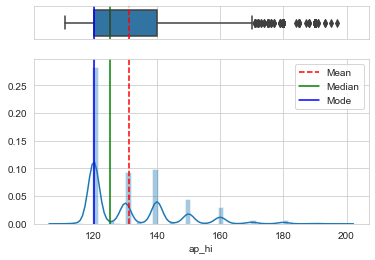

In [40]:

# Calcualte and plot mean medium and mode of ap_hi and spread of dataCalcualte mean medium and mode

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_hi'].mean()
median=df['ap_hi'].median()
mode=df['ap_hi'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_hi"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#create Histogram
sns.distplot(df["ap_hi"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are very close 128,120 and 120. As data is spread on higher side and Mean gets impacted by extrime values, mean is little higher than median and mode. 


### Mean, Median and Mode for ap_lo


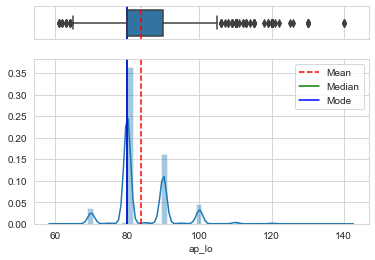

In [41]:
# Calcualte and plot mean medium and mode of ap_lo and spread of dataCalcualte mean medium and mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_lo'].mean()
median=df['ap_lo'].median()
mode=df['ap_lo'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_lo"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#Create histogram
sns.distplot(df["ap_lo"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

As calucate above Mean, Medium and Mode are 96,80 and 80.Mode and medium alinge however mean is higher as mean get infulanced by extrime values. 

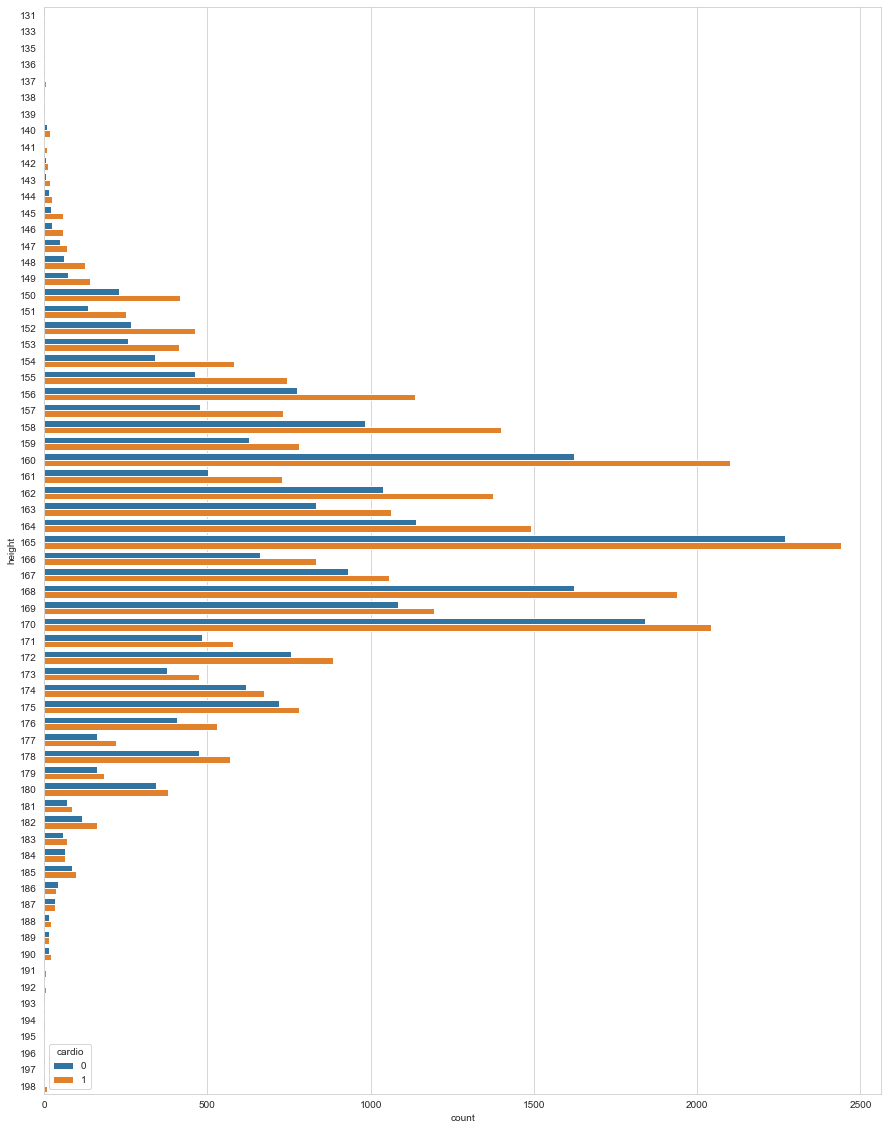

In [42]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 20
df['weight'] = (df['height']).round().astype('int')
sns.countplot(y='height', hue='cardio', data = df);

# New Features

In [43]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['age_yr'] = df['age']/360

In [44]:
df['Blood_Pressure_Level_S'] = pd.cut(df1.ap_hi,[0,120,129,139,180, 200],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_S

df['Blood_Pressure_Level_D'] = pd.cut(df1.ap_lo,[0,78,80,90,120,140],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_D

1        Hyper_Stage1
2              Normal
3        Hyper_Stage2
5            Elevated
6            Elevated
             ...     
69995        Elevated
69996    Hyper_Stage1
69997    Hyper_Stage1
69998        Elevated
69999        Elevated
Name: Blood_Pressure_Level_D, Length: 53053, dtype: category
Categories (5, object): ['Normal' < 'Elevated' < 'Hyper_Stage1' < 'Hyper_Stage2' < 'Hyper_Stage3']

# Visualize Attributes

# Explore Joint Attributes

### HeatMap
Heat Maps is a type of plot which is necessary when we need to find the dependent variables

Age show some correlation with glucose, ap_lo, ap_hi, and cholesterol. These variables' values are expected to go up with age. Cardio also show a higher correlation with age, i.e., people at higher age are expected to get CVD. Alcohol and Smoking show a higher correlation with gender. Men smoke and drink alcohol more than women. However, cardio and smoke do not indicate a high correlation. Smoking is related to height too (maybe a good example of correlation do not lead to causation)

Weight shows a relationship with ap_lo and ap_hi. Also, ap_lo and ap_hi show 70% correlation. A strong relationship is observed between cholesterol and glucose, as well.

<AxesSubplot:>

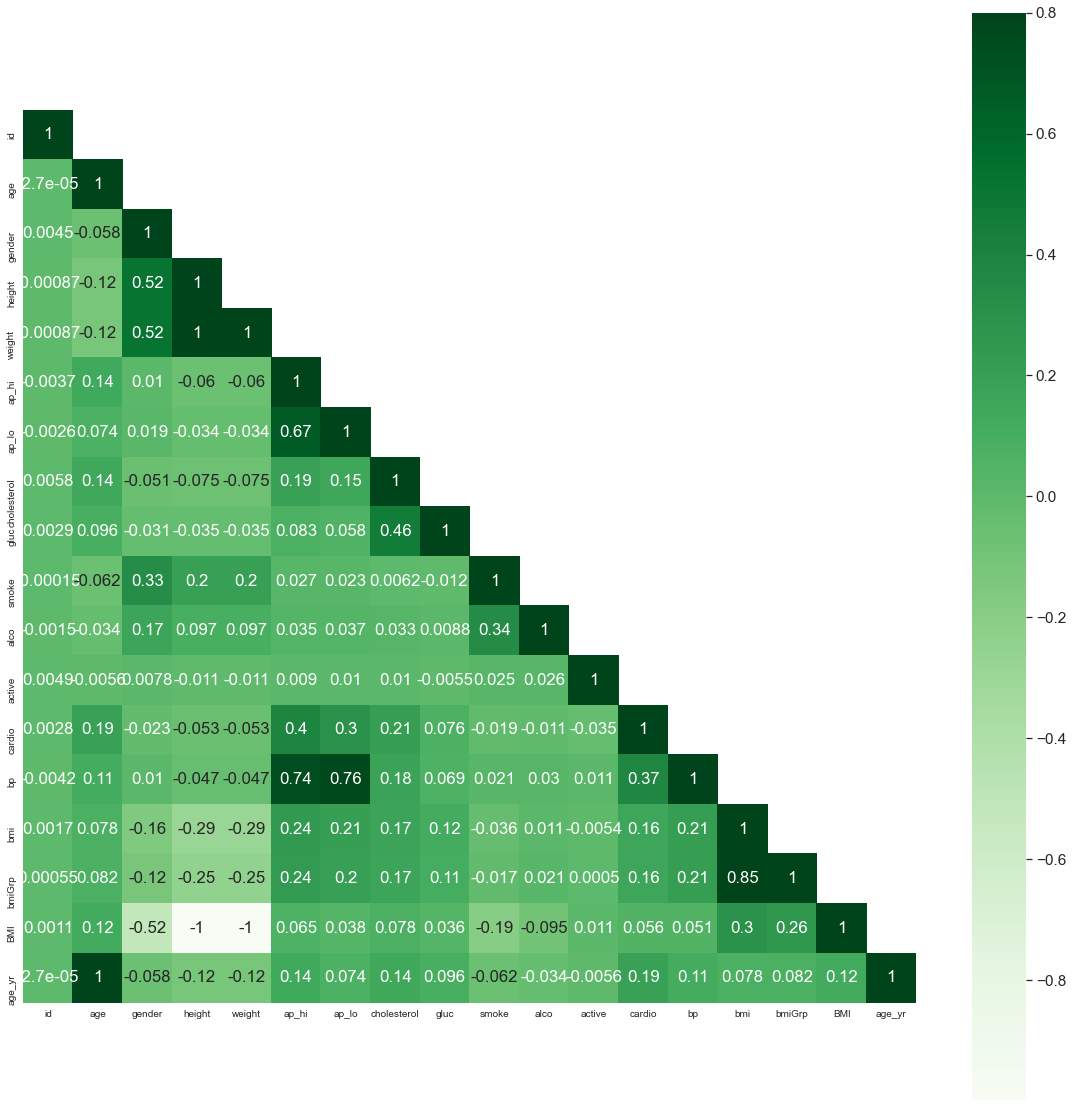

In [45]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.set(font_scale=1.4)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=0.8, square=True,annot=True)

### Bivariate Analysis
Categorical variables by target class :It is evident that patients with CVD have higher cholesterol and blood glucose level (look at Red and Green bars), also they are less active (higher blue and lower orange bar).

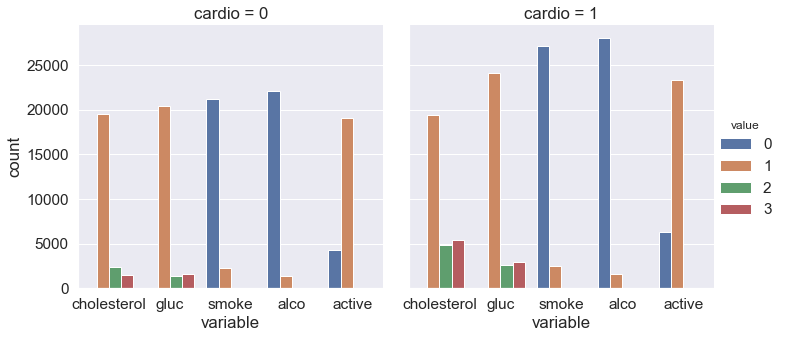

In [46]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

### Correlation of all the variable with cardio

In [47]:
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)

id             0.002808
age            0.191239
gender        -0.023324
height        -0.053357
weight        -0.053357
ap_hi          0.395271
ap_lo          0.296446
cholesterol    0.205732
gluc           0.075609
smoke         -0.019257
alco          -0.011291
active        -0.034716
bp             0.372455
bmi            0.159923
bmiGrp         0.157239
BMI            0.055527
age_yr         0.191239
Name: cardio, dtype: float64


Age, Weight and Cholestro shows higest coreleation. 


### Scatter Plot Age vs. Weight


In [51]:
fig, ax = plt.subplots(1,1, figsize = (30,10))
sns.scatterplot(df['weight'],df['age'],ax=ax,hue=df['cardio'])
ax.set_title('age vs weight')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 2160x720 with 1 Axes>

Higher age and more weight shows high probality of CVD relation

### Pair Plot

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

### Pair Plot using cardio grouping

In [ ]:
sns.pairplot(df, hue = 'cardio')

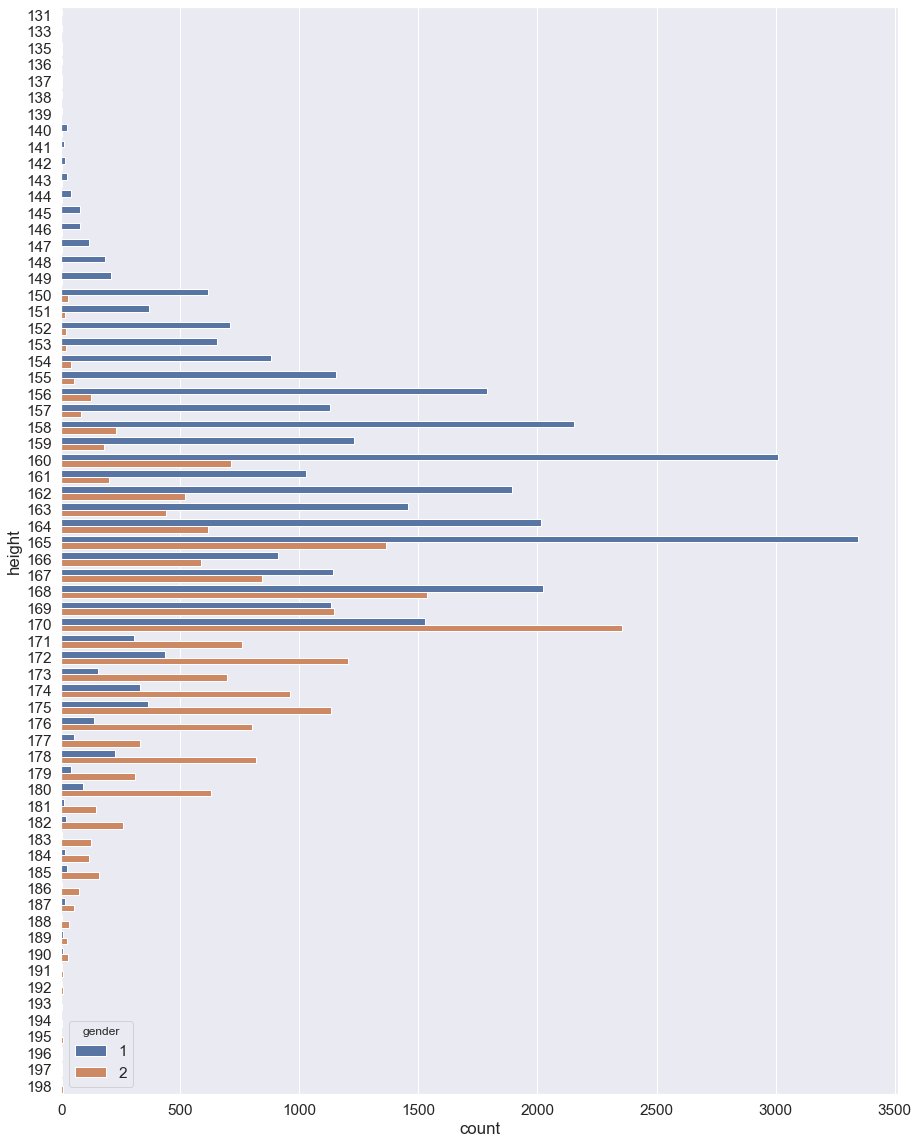

In [54]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 20
df['weight'] = (df['height']).round().astype('int')
sns.countplot(y='height', hue='gender', data = df);

### BMI, alcohol, gender, and cardio

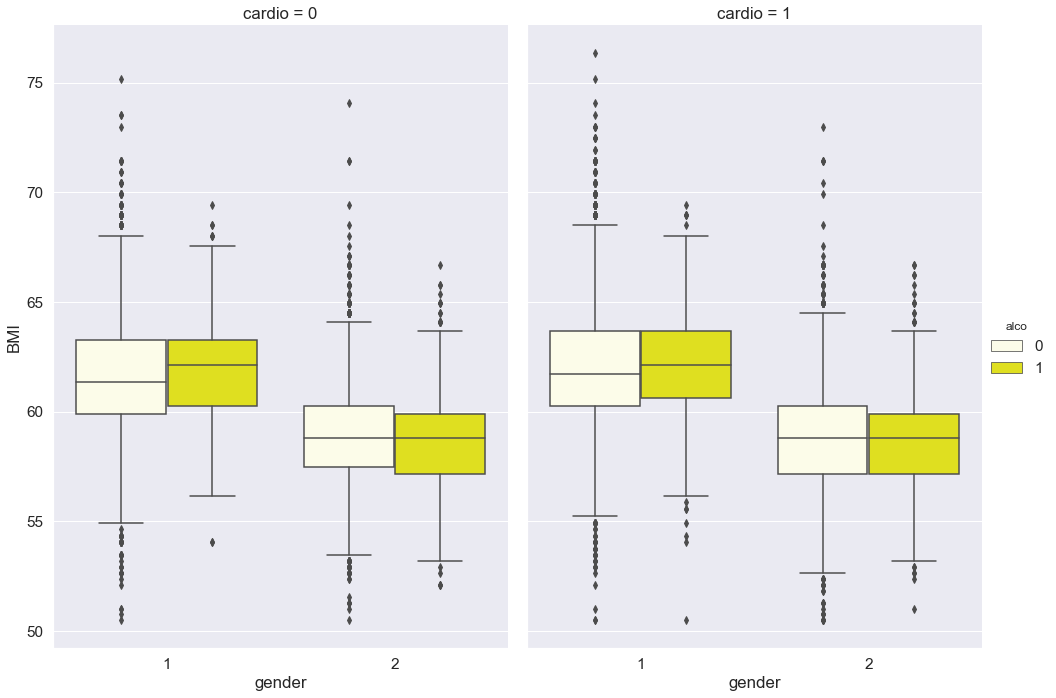

In [55]:
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

### Pivot smoke, alco, age and cardio

In [56]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'alco'], aggfunc='mean')

age    cardio
gender alco                        
1      0     19795.141581  0.567715
       1     19550.659379  0.569620
2      0     19530.756876  0.546438
       1     19263.235125  0.521593

In [57]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'smoke'], aggfunc='mean')

age    cardio
gender smoke                        
1      0      19797.551865  0.567846
       1      19277.948490  0.563055
2      0      19583.383945  0.549234
       1      19203.908983  0.523821

Data indicate that Men smoking and taking alcohol are less venerable to CVD. In case of women, no much alchol impact and smoking show less venerable to CVD. 

### Cross Tabulation between Smoke and Alcohol

In [58]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,46780,1491
1,3320,1462


In given data set most of the people neighter smoke or drink alcohol (~88%) only only ~2.5% smoke and drink only ~9.5% people eiher smoke or drink. 

# Explore Attributes & Class

In [ ]:
cardio = df[df["cardio"]==1]
noncardio = df[df["cardio"]==0]


plt.hist(cardio['age'], alpha=0.5, label='cardio')
plt.hist(noncardio['age'], alpha=0.5, label='noncardio')
plt.title("Age Histograms")
plt.xlabel("age")
plt.legend(loc='upper right')
plt.show()

In [ ]:
bc=sns.countplot(x="gender", hue="cardio",palette="muted",data=df)
bc.set_title('Gender and Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Gender (1=Female, 2=Male)')

As blood pressure increases, the likelihood of getting a cardio increases.

In [ ]:
sns.lmplot('ap_hi', 'ap_lo', data=df, hue='cardio', fit_reg=False, scatter_kws={'alpha':0.25})


In [ ]:
sns.barplot(x='cardio', y='Blood_Pressure_Level_D', data=df, saturation=0.8)
plt.title('Cardiac Event and Dyastolic Blood Pressure')

In [ ]:
bc=sns.countplot(x="cholesterol", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Cholesterol Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

Cholesterol values over 1 seem to have an impact on cardiovascular disease.

In [ ]:
bc=sns.countplot(x="gluc", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Glucose Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

In [ ]:
bc=sns.countplot(x="smoke", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Smoking Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Smoker')

In [ ]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Alcohol Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Drinks Alcohol')

In [ ]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Active Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Active')

# Exceptional Work

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

In [ ]:
#PCA with scaled data

from sklearn.decomposition import PCA

X = df_scaled
y = df_scaled[12]

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca)

ax = df_pca.plot.scatter(0, 1, c=y, colormap='autumn')
#newfig = plt.figure()
ax.set_title('PC1 vs PC2 by Cardio')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')